# 1. Chris's original plot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas
mpl.rcParams['figure.dpi'] = 300

chris_table = np.loadtxt('output_chris.txt',skiprows=0)
#print chris_table

#set the upper and lower bound for reading table
lower_bound = 800
upper_bound = 1524

In [2]:
j = chris_table[lower_bound:upper_bound,0]
j5DNHI = chris_table [lower_bound:upper_bound,1]
y1H = chris_table[lower_bound:upper_bound,2]
y1He = chris_table[lower_bound:upper_bound,3]
EH = chris_table[lower_bound:upper_bound,4]
Te = chris_table[lower_bound:upper_bound,5]

j5DNHI = j5DNHI/1e+18
Te = Te/10000

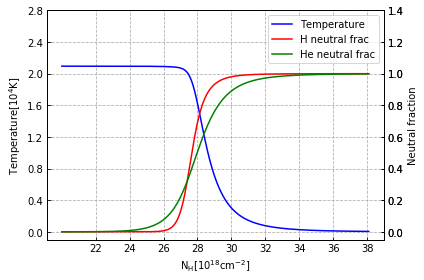

In [3]:
fig, ax1 = plt.subplots()

#get the plot
list1, = ax1.plot(j5DNHI, Te, 'b-', label='Temperature')
ax1.set_xlabel("$\mathregular{N_H[10^{18}cm^{-2}]}$")
ax1.set_ylabel("$\mathregular{Temperature[10^4K]}$")
plt.grid(linestyle = '--')

#align ticks
major_tickx = np.arange(22, 39, 2)
major_ticky = np.arange(0, 3.2, 0.4)
ax1.set_xticks(major_tickx)
ax1.set_yticks(major_ticky)

#twinx to create multiple y axis
ax2 = ax1.twinx()
list2, = ax2.plot(j5DNHI, y1H, 'r-', label='H neutral frac')
ax2.set_ylabel("Neutral fraction")
minor_ticky = np.arange(0, 1.6, 0.2)
ax2.set_yticks(minor_ticky)

ax3 = ax1.twinx()
list3, = ax3.plot(j5DNHI, y1He, 'g-', label = 'He neutral frac')
ax3.set_yticks(minor_ticky)

# #add top tick
# ax4 = ax3.twiny()
# ax4.plot(j5DNHI, y1He)
# ax4.set_xticks(major_tickx)
# ax4.set_yticks(minor_ticky)
# ax4.cla()

#change tick direction
axs = [ax1, ax2, ax3]
for ax in axs:
    ax.tick_params(direction = 'in')

#add legend
lists = [list1, list2, list3]
ax1.legend(lists, [list.get_label() for list in lists], loc='upper right')


fig.tight_layout()
plt.savefig("chris.pdf")
plt.show()

# 2. NaN bug

## The NaN bug comes from negative temperature when subtracting a temperature constant.

# dEH inconsistent issue

### For dEH[3], we track the difference between the one with cooling function and the one without.

In [4]:
dEH3_cool_file = '../output/grid3/020419_5/2y_0_dEH50_dEHgrid3.txt'
dEH3_cool = np.genfromtxt(dEH3_cool_file, dtype = 'f16', skip_header = 1, usecols = (2), max_rows=12000)
print(dEH3_cool)

dEH3_no_cool_file = '../output/grid3/020419_6/2y_0_dEH50_dEHgrid3_no_cool.txt'
dEH3_no_cool = np.genfromtxt(dEH3_no_cool_file, dtype = 'f16', skip_header=1, usecols=(2), max_rows=12000)
print(dEH3_no_cool)

[6.57527062e-19 6.54969356e-19 6.52411180e-19 ... 5.57753988e-34
 5.56287144e-34 5.54824158e-34]
[6.57527062e-19 6.54969356e-19 6.52411180e-19 ... 5.57753988e-34
 5.56287144e-34 5.54824158e-34]


### For dEH[1245], we track the difference between the one with cooling function and the one without.

In [5]:
dEH1245_cool_file = '../output/grid1245/020419_1/2y_0_dEH50_dEHgrid1245.txt'
dEH1245_cool = np.genfromtxt(dEH1245_cool_file, dtype = 'f16', skip_header = 1, usecols = (2), max_rows=12000)
print(dEH1245_cool)

dEH1245_no_cool_file = '../output/grid1245/020419_2/2y_0_dEH50_dEHgrid1245_no_cool.txt'
dEH1245_no_cool = np.genfromtxt(dEH1245_no_cool_file, dtype = 'f16', skip_header=1, usecols=(2), max_rows=12000)
print(dEH1245_no_cool)

[1.36621218e-25 1.36715173e-25 1.36809211e-25 ... 8.43112538e-21
 8.44738860e-21 8.46368973e-21]
[1.36621218e-25 1.36715173e-25 1.36809211e-25 ... 8.43112538e-21
 8.44738860e-21 8.46368973e-21]


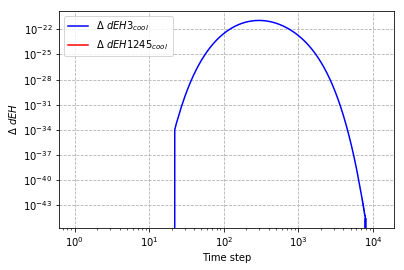

In [6]:
#dEH1245_cool = [x - 1e-38 for x in dEH1245_cool]
fig_cool, ax_cool = plt.subplots()
ax_cool.set_yscale('log')
ax_cool.set_xscale('log')
list_dEH3, = ax_cool.plot(dEH3_no_cool[0:] - dEH3_cool[0:], 'b-', label='$\Delta dEH3_cool$')
list_dEH1245 = ax_cool.plot(dEH1245_no_cool[0:] - dEH1245_cool[0:],'r-',label='$\Delta dEH1245_cool$')
ax_cool.set_xlabel("Time step")
ax_cool.set_ylabel("$\Delta\ dEH$")
ax_cool.legend(["$\Delta\ dEH3_{cool}$","$\Delta\ dEH1245_{cool}$"])
plt.grid(linestyle = '--')
plt.show()

### Cooling function comparison for all grids at time step 12000

In [7]:
Te_cool = np.genfromtxt(dEH3_cool_file, dtype = 'f16', skip_header = 12008, usecols = (5))
Te_no_cool = np.genfromtxt(dEH3_no_cool_file, dtype = 'f16', skip_header = 12008, usecols = (5))
NH = chris_table[: , 1]/1e+18
print(Te_cool[:20])
print(Te_no_cool[:20])
print(NH[:20])

[14467.4 14676.9 14881.1 15080.  15273.5 15461.5 15643.9 15820.7 15991.9
 16157.4 16317.5 16472.  16621.1 16764.9 16903.5 17036.9 17165.3 17288.9
 17407.8 17522. ]
[14497.2 14711.9 14922.1 15127.7 15328.4 15524.3 15715.4 15901.5 16082.7
 16258.9 16430.3 16596.8 16758.4 16915.3 17067.6 17215.2 17358.3 17497.
 17631.3 17761.4]
[0.0125 0.0375 0.0625 0.0875 0.1125 0.1375 0.1625 0.1875 0.2125 0.2375
 0.2625 0.2875 0.3125 0.3375 0.3625 0.3875 0.4125 0.4375 0.4625 0.4875]


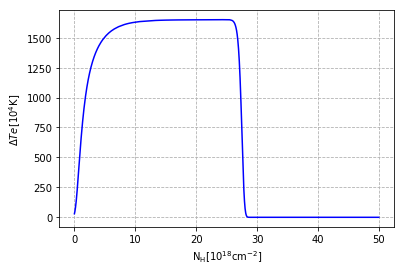

In [8]:
fig_cool_Te, ax_cool_Te = plt.subplots()
ax_cool_Te.set_yscale('linear')
ax_cool_Te.plot(NH[:], abs(Te_cool[:] - Te_no_cool[:]), 'b-')
ax_cool_Te.set_xlabel("$\mathregular{N_H[10^{18}cm^{-2}]}$")
ax_cool_Te.set_ylabel("$\Delta Te\mathregular{[10^4K]}$")
plt.grid(linestyle = '--')
plt.show()

# 3. Plot tauHIIe

## At timestep 12000

In [9]:
dEH_cool = np.genfromtxt(dEH3_cool_file, dtype = 'f16', skip_header = 12008, usecols = (8))
tauHIIe_cool = np.genfromtxt('../output/tauHIIe/tau_1_time_12000.txt', dtype = 'f16', skip_header = 9, usecols = (9))
print(dEH_cool[:])
print(tauHIIe_cool[:])
print(len(NH))
print(len(tauHIIe_cool))

[5.23168547e-34 5.33405851e-34 5.43954697e-34 ... 2.34918980e-24
 2.33024405e-24 2.31145651e-24]
[-4.73545359e-30 -4.66637009e-30 -4.60069139e-30 ... -3.19991373e-20
 -5.13054954e-20 -7.07959026e-20]
2000
2000


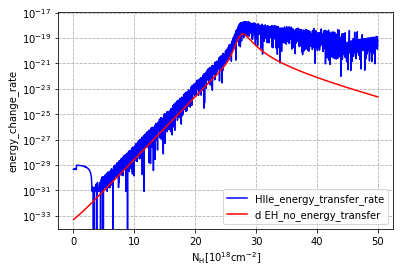

In [10]:
fig_tauHIIe_cool, ax_tauHIIe_cool = plt.subplots()
list_tauHIIe_cool, = ax_tauHIIe_cool.plot(NH[:], abs(tauHIIe_cool[:]),'b-', label='HIIe_energy_transfer_rate')
list_dEH_cool, = ax_tauHIIe_cool.plot(NH[1:], dEH_cool[1:],'r-', label='d EH_no_energy_transfer')

ax_tauHIIe_cool.set_xlabel("$\mathregular{N_H[10^{18}cm^{-2}]}$")
ax_tauHIIe_cool.set_ylabel("energy_change_rate")

lists=[list_tauHIIe_cool, list_dEH_cool]
ax_tauHIIe_cool.legend(lists, [list.get_label() for list in lists], loc='lower right')

plt.grid(linestyle = '--')

ax_tauHIIe_cool.set_yscale('log')
plt.show()

## Compare Temperature evolution when including tauHIIe

In [11]:
Te_HIIe = np.genfromtxt('../output/tauHIIe/tau_1_time_12000.txt', dtype='f16', skip_header=9, usecols=(5))
THII_HIIe = np.genfromtxt('../output/tauHIIe/tau_1_time_12000.txt', dtype='f16', skip_header=9, usecols=(7))
print(len(Te_HIIe), len(THII_HIIe), len(NH), len(Te_cool))

(2000, 2000, 2000, 2000)


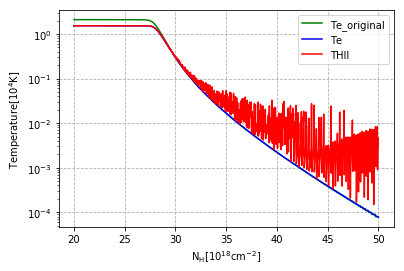

In [12]:
fig_T_HIIe, ax_T_HIIe = plt.subplots()
start_index = 800
list_original_Te, = ax_T_HIIe.plot(NH[start_index:], Te_cool[start_index:]/1e4,'g-',label='Te_original')
list_Te, = ax_T_HIIe.plot(NH[start_index:],Te_HIIe[start_index:]/1e4,'b-',label='Te')
list_THII, = ax_T_HIIe.plot(NH[start_index:],THII_HIIe[start_index:]/1e4,'-r',label='THII')

ax_T_HIIe.set_xlabel("$\mathregular{N_H[10^{18}cm^{-2}]}$")
ax_T_HIIe.set_ylabel("$\mathregular{Temperature[10^4K]}$")

lists=[list_original_Te, list_Te, list_THII]
ax_T_HIIe.legend(lists,[list.get_label() for list in lists], loc='upper right')

plt.grid(linestyle='--')
ax_T_HIIe.set_yscale('log')
plt.show()

# Stiff issue & Non-linear system of ODEs

In [13]:
from math import * 
x=7
for iter in range(10):
    print iter,x,x+log(x)
    x+=7-(x+log(x))

0 7 8.94591014906
1 5.05408985094 6.67428763794
2 5.37980221301 7.06245382312
3 5.31734838988 6.98832314603
4 5.32902524385 7.00219358423
5 5.32683165962 6.99958828571
6 5.32724337391 7.00007728766
7 5.32716608625 6.99998549189
8 5.32718059436 7.00000272342
9 5.32717787094 6.99999948877


In [17]:
Te_exp = np.genfromtxt('../output/output_chris.txt', dtype='f16', usecols=(5))
Te_HIIe_imp = np.genfromtxt('../output/stiff_solver/grid_800_1_sq3.txt', dtype='f16', skip_header=12010, usecols=(5))
THII_HIIe_imp = np.genfromtxt('../output/stiff_solver/grid_800_1_sq3.txt', dtype='f16', skip_header=12010, usecols=(7))
print(len(Te_exp),len(Te_HIIe_imp),len(THII_HIIe_imp))

(2000, 2000, 2000)


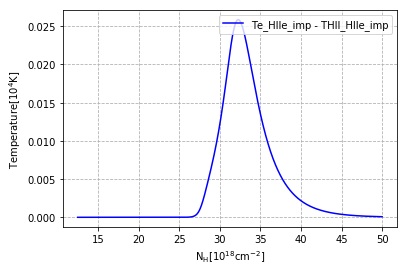

In [18]:
fig_T_implicit, ax_T_implicit = plt.subplots()
start_index = 500
#list_original_Te, = ax_T_implicit.plot(NH[start_index:],Te_exp[start_index:]/1e4,'g-',label="Te_exp")
list_Te, = ax_T_implicit.plot(NH[start_index:],(Te_HIIe_imp[start_index:]-THII_HIIe_imp[start_index:])/1e4,'b-',label="Te_HIIe_imp - THII_HIIe_imp")
#list_THII, = ax_T_implicit.plot(NH[start_index:],THII_HIIe_imp[start_index:]/1e4,'r-',label="THII_HIIe_imp")

ax_T_implicit.set_xlabel("$\mathregular{N_H[10^{18}cm^{-2}]}$")
ax_T_implicit.set_ylabel("$\mathregular{Temperature[10^4K]}$")

lists=[list_Te]
ax_T_implicit.legend(lists,[list.get_label() for list in lists], loc='upper right')

plt.grid(linestyle='--')
ax_T_implicit.set_yscale('linear')
plt.savefig("Temperature_difference.png",dpi=300,bbox_inches='tight')
plt.show()

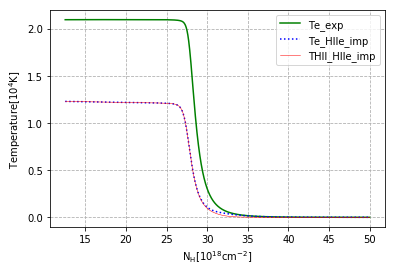

In [19]:
fig_T_implicit_ev, ax_T_implicit_ev = plt.subplots()
start_index = 500
list_original_Te, = ax_T_implicit_ev.plot(NH[start_index:],Te_exp[start_index:]/1e4,'g-',label="Te_exp")
list_Te, = ax_T_implicit_ev.plot(NH[start_index:],(Te_HIIe_imp[start_index:])/1e4,'b-',label="Te_HIIe_imp",linestyle=':')
list_THII, = ax_T_implicit_ev.plot(NH[start_index:],THII_HIIe_imp[start_index:]/1e4,'r-',label="THII_HIIe_imp",lw=0.5)

ax_T_implicit_ev.set_xlabel("$\mathregular{N_H[10^{18}cm^{-2}]}$")
ax_T_implicit_ev.set_ylabel("$\mathregular{Temperature[10^4K]}$")

lists=[list_original_Te,list_Te, list_THII]
ax_T_implicit_ev.legend(lists,[list.get_label() for list in lists], loc='upper right')

plt.grid(linestyle='--')
ax_T_implicit.set_yscale('linear')

plt.savefig("Temperature_evolution.png",dpi=300,bbox_inches='tight')
plt.show()
